### Importing Packages

In [18]:
from pyimagesearch.io import Hdf5DatasetLoader
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from config import config
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [19]:
BATCH_SIZE = 32

In [34]:
from config import config

loader = Hdf5DatasetLoader()
X_train, y_train = loader.load(config.GLP_HDF5, shuffle=True, max_items=100)

(32, 64, 128, 1)


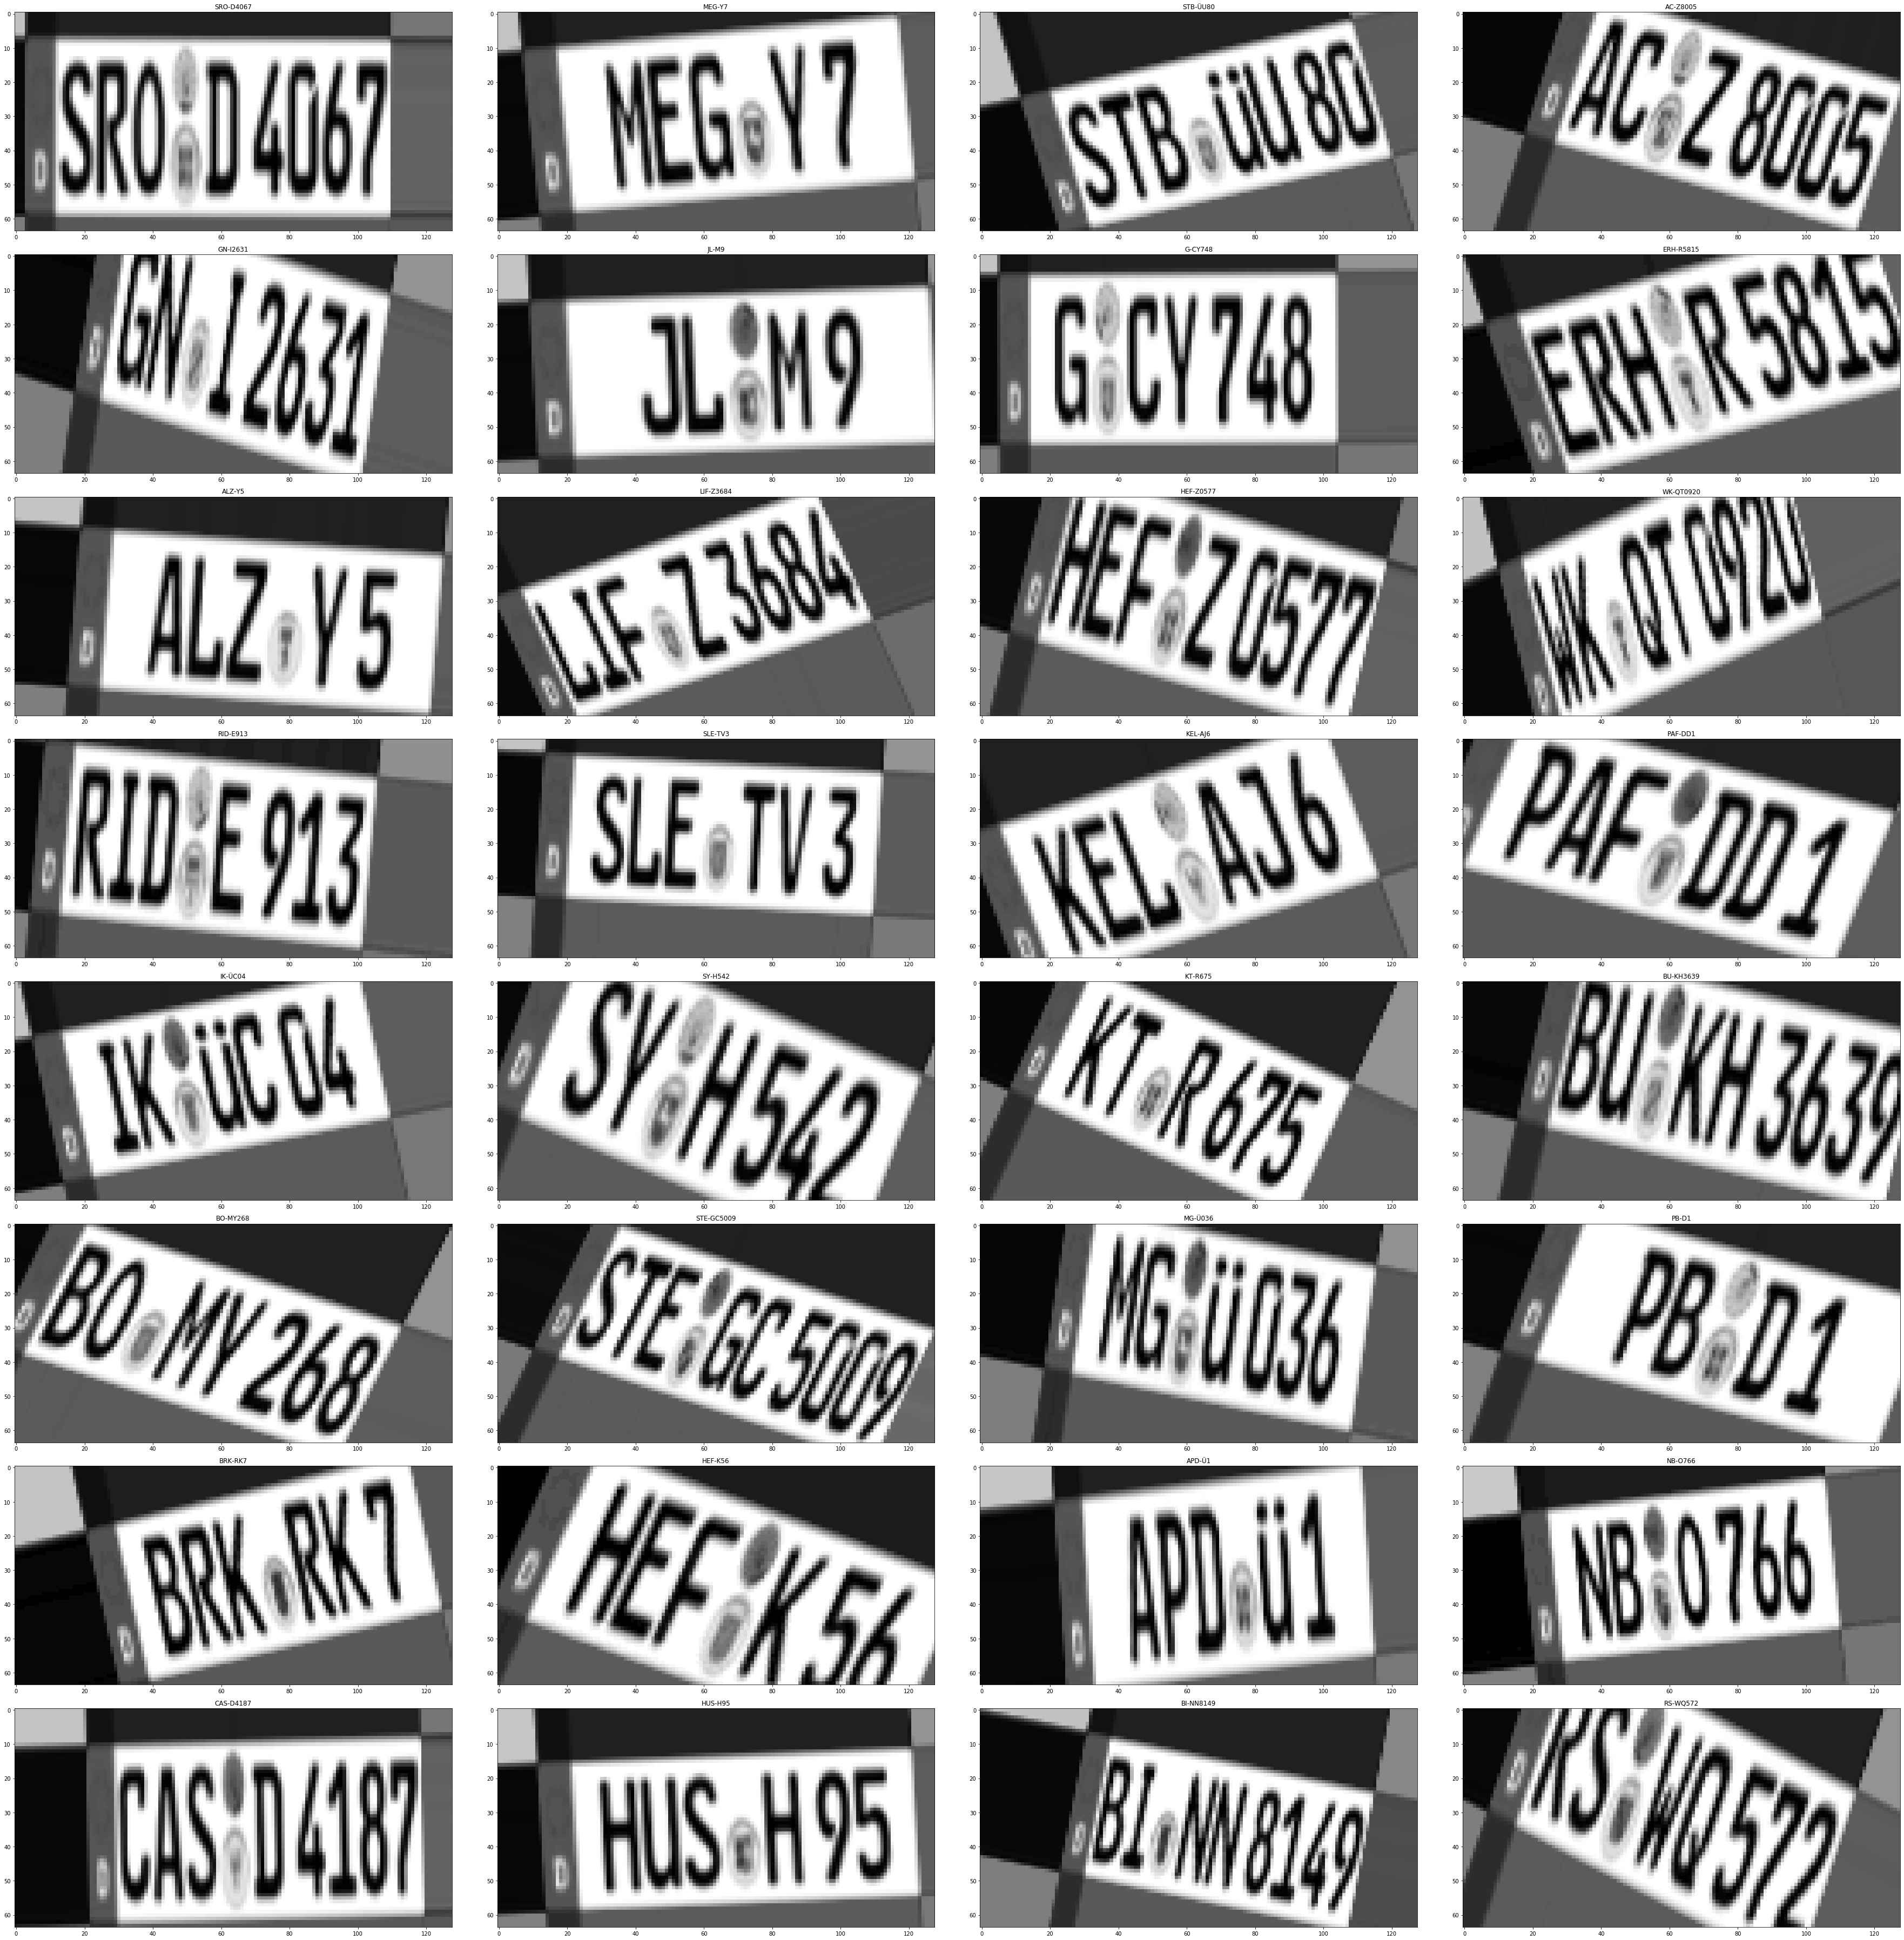

In [35]:
def preprocess(image):
    image = np.array(image)
    image = skimage.transform.resize(image, (config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
    return image

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.10,
    height_shift_range=0.10,
    zoom_range=[1.0, 1.5],
    #shear_range=1.5,
    brightness_range=[0.1, 1.0],
    fill_mode='nearest',
    horizontal_flip=False,
    validation_split=0.2)

X_train = np.asarray([image.reshape(32, 151, 1) for image in X_train])
X_train = np.asarray([skimage.transform.resize(image, (config.IMAGE_HEIGHT, config.IMAGE_WIDTH)) for image in X_train])
images, labels = next(data_gen.flow(X_train, y_train, batch_size=BATCH_SIZE))
#images = np.asarray([skimage.transform.resize(image, (config.IMAGE_HEIGHT, config.IMAGE_WIDTH)) for image in images])

print (images.shape)

def plotImages(images_arr, labels, rows, columns):
    fig, axes = plt.subplots(rows, columns, figsize=(50,50))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels, axes):
        img = np.squeeze(img, axis=(2,))
        ax.set_title(label)
        ax.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()
    
plotImages(images, labels, int(BATCH_SIZE / 4), 4)